In [1]:
import numpy as np
import pandas as pd

from gtda.time_series import SlidingWindow
from gtda.diagrams import PersistenceLandscape
from gtda.homology import VietorisRipsPersistence

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
pd.set_option('display.max_columns', None)
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
# !pip install spectrum 
# from spectrum.periodogram import speriodogram

import statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess

from pylab import *

In [2]:
# Functions to compute the Lp norms
# Find the range of x values from the persistence diagram:
def Ftseq(diagram):
    births =[]
    deaths =[]
    for pair in diagram:
        if pair[2] == 1:
            births.append(pair[0])
            deaths.append(pair[1])
    return np.linspace(min(births), max(deaths), 100)

# Calculate Lp norm:
def Lpnorm(tseq, landscapevalues, p = 1):
    norms = []
    if p.lower() == 'auc':
        for point in zip(tseq,landscapevalues):
            norms.append(np.trapz(landscapevalues, tseq))
    else: 
        for point in zip(tseq,landscapevalues):
            norms.append(np.linalg.norm(point, p))        
    return sum(norms)

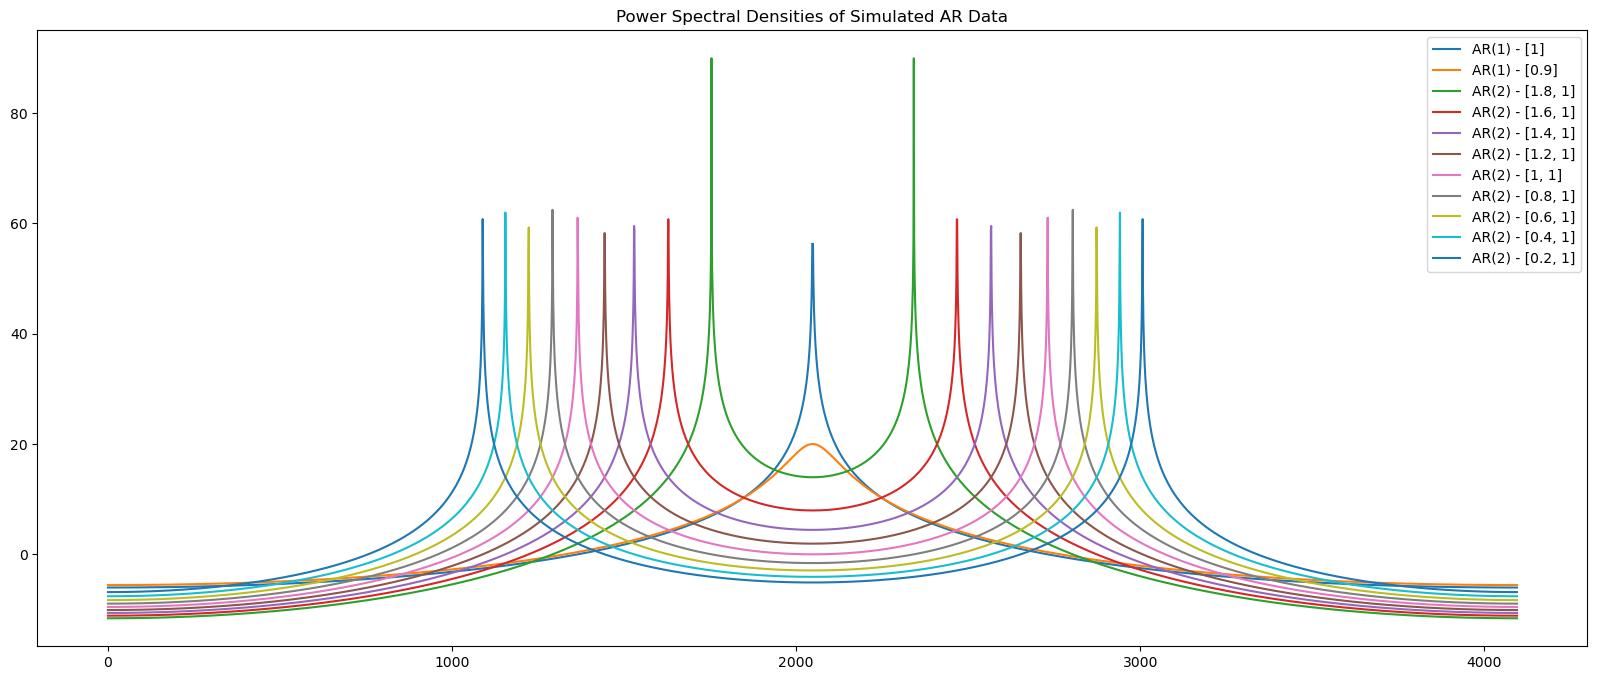

In [3]:
import spectrum.arma
from pylab import plot, log10, legend

plt.figure(figsize = (20,8), facecolor = 'white')
# plt.subplot(2,1,1)
arterms = [1]
plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
arterms = [.9]
plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
arterms = [1.8,1]
plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
arterms = [1.6,1]
plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
arterms = [1.4,1]
plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
arterms = [1.2,1]
plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
arterms = [1,1]
plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
arterms = [.8,1]
plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
arterms = [.6,1]
plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
arterms = [.4,1]
plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
arterms = [.2,1]
plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))

plt.title('Power Spectral Densities of Simulated AR Data')
legend()


# plt.subplot(2,1,2)
# arterms = [.5]
# plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
# arterms = [.9]
# plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
# plt.title('AR Power Comparison')
# legend()

## TDA of Time Series Against its Lags

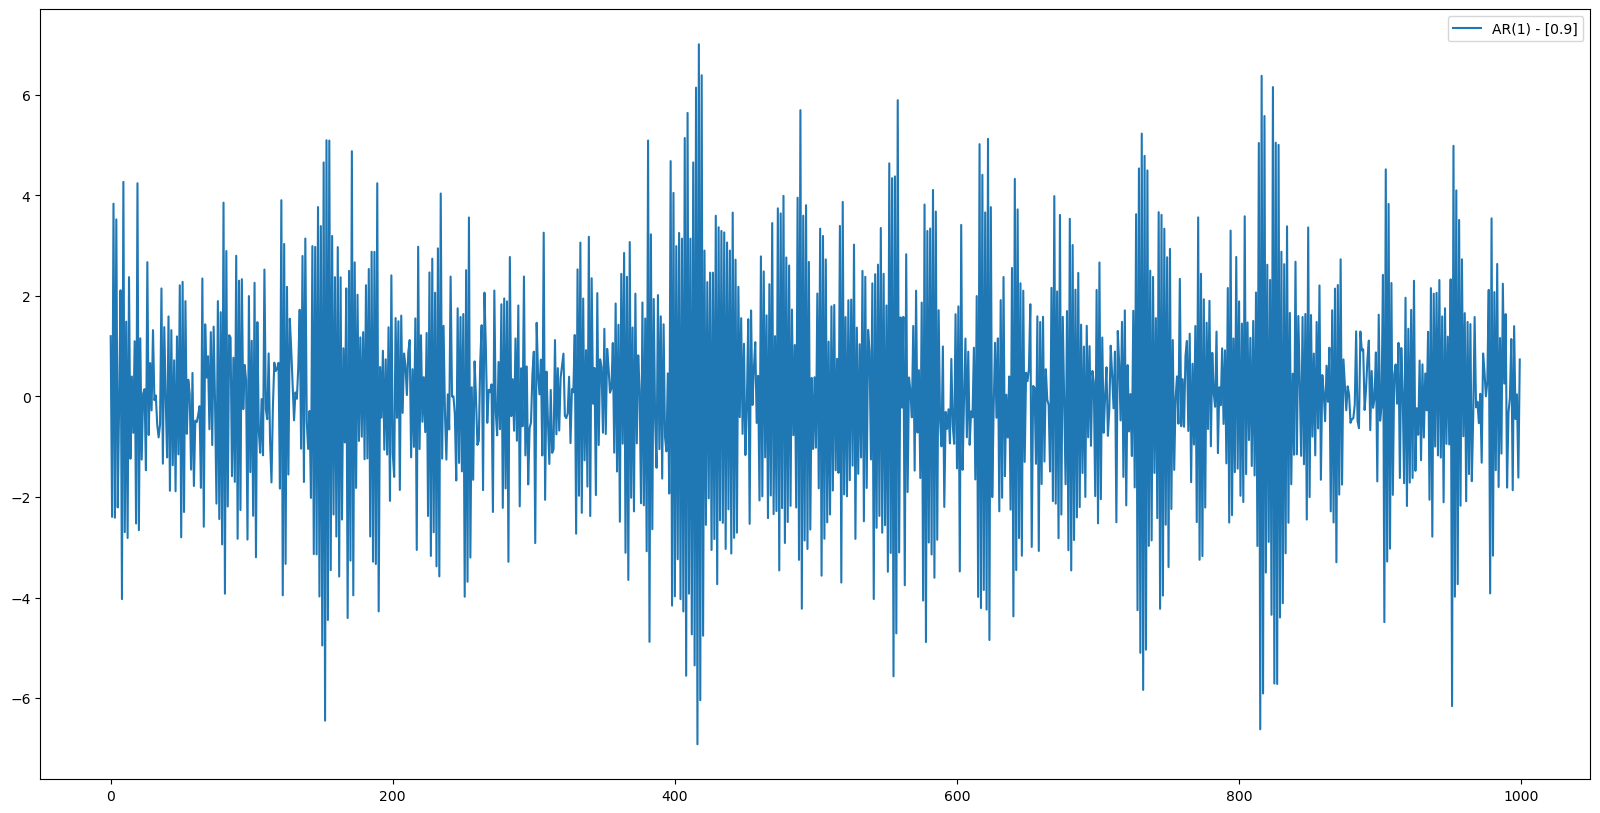

In [4]:
n = 1000

np.random.seed(1122) 
arterms1 = [.9]
ar = np.append([1], arterms1)
ma = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data1 = AR_object.generate_sample(nsample=n, burnin = 10000)
plt.figure(figsize = (20,10))
plt.plot(simulated_data1, label = 'AR(' + str(len(arterms1)) + ') - '  +str(arterms1))
legend()
plt.show()


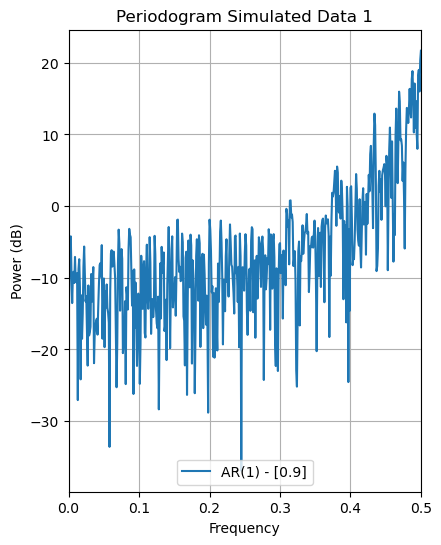

In [5]:
from spectrum import Periodogram
from spectrum import speriodogram

plt.figure(figsize = (10,6), facecolor = 'white')
plt.subplot(1,2,1)
p = Periodogram(simulated_data1
#                 , sampling=len(simulated_data1)
               )
p.run()
p.plot(sides='onesided', label = 'AR(' + str(len(arterms1)) + ') - '  +str(arterms1))
plt.title('Periodogram Simulated Data 1')
plt.legend(loc = 'lower center')

In [6]:
simulated_datadf1 = pd.DataFrame({'Simulated Data 1' : simulated_data1
             })
simulated_datadf1['Simulated Data 2 (lag1)'] = simulated_datadf1['Simulated Data 1'].shift()
simulated_datadf1 = simulated_datadf1.dropna()

simulated_datadf1.head()

,Simulated Data 1,Simulated Data 2 (lag1)
1,-2.395736,1.199632
2,3.837022,-2.395736
3,-2.411561,3.837022
4,3.523737,-2.411561
5,-2.207392,3.523737


In [7]:
dataPct1 = simulated_datadf1.pct_change()
dataPct1 = dataPct1.dropna()
# dataPct.head()

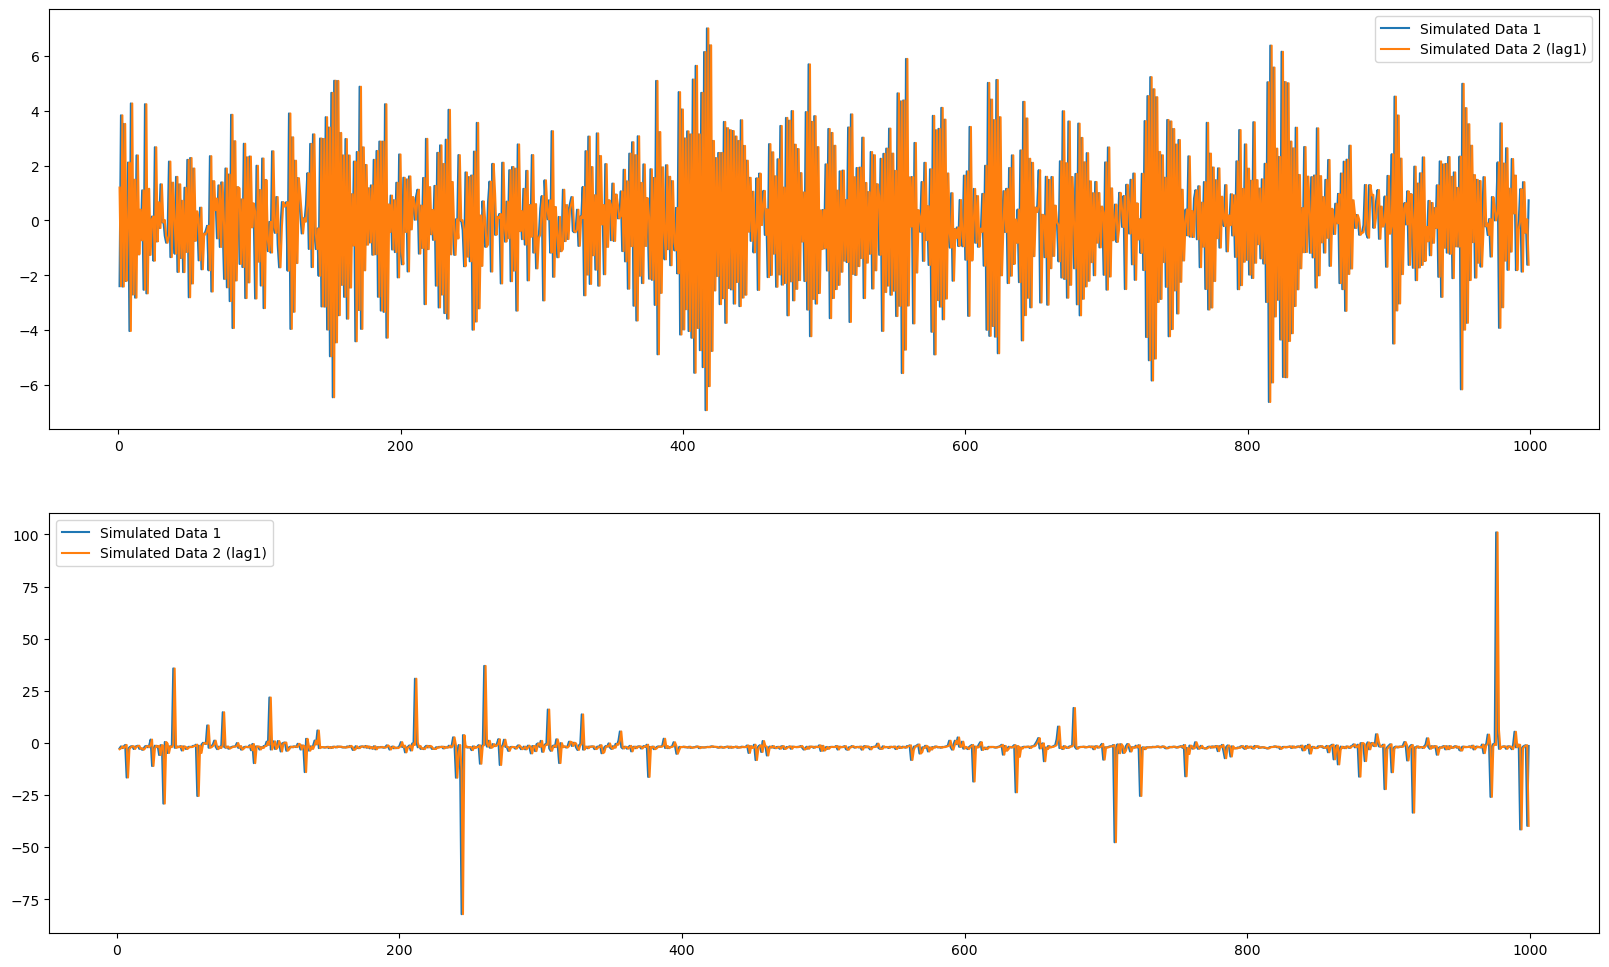

In [8]:
plt.figure(figsize = (20,12), facecolor = 'white')
plt.subplot(2,1,1)
plt.plot(simulated_datadf1, label = simulated_datadf1.columns)
plt.legend()

plt.subplot(2,1,2)
plt.plot(dataPct1, label = simulated_datadf1.columns)
plt.legend()
plt.show()

In [9]:
# fig = px.line(simulated_datadf1,
#               width=1000, height=700
#               , title = 'Synthetic Data')
# fig.show()

# fig = px.line(dataPct1,
#               width=1000, height=700
#               ,title = 'Percent Change')
# fig.show()

In [10]:
# Create point cloud of size 60 and stride 1
window_size = 150
stride = 1
df = simulated_datadf1
X = df
y = df.index
SW = SlidingWindow(size=window_size, stride=stride)
X_sw, yr = SW.fit_transform_resample(X, y)

In [11]:
# # Plot an arbitrary point cloud in 3D
# win = 60
# fig = px.scatter(x = X_sw[win][:,0],
#                     y = X_sw[win][:,1],
# #                     z = X_sw[win][:,2],
#                     labels = {'x': 'Simulated Data 1',
#                               'y': 'Simulated Data 2',
# #                               'z': 'Simulated Data 3'
#                              },
#                     width=1000, height=700,)
# fig.show()

In [12]:
# # Plot the persistence diagram and landscape for a random point cloud sliding window
# from gtda.homology import VietorisRipsPersistence
# pointcloud = X_sw[40]

# vrp = VietorisRipsPersistence()
# vrp.fit_transform_plot(pointcloud.reshape(1, *pointcloud.shape))
# plt.show()

# pl = PersistenceLandscape()
# persistencediagram = vrp.fit_transform(pointcloud.reshape(1, *pointcloud.shape))
# landscapedata = pl.fit_transform(persistencediagram)
# pl.plot(landscapedata, homology_dimensions = [1], plotly_params=None)

In [13]:
# Calculate the norms for each of the windows in the multivariate sliding window

# Initialize empty list
Norms = np.empty(window_size-1)
Norms[:] = np.nan
Norms = list(Norms)
vrp = VietorisRipsPersistence()
pl = PersistenceLandscape()
for pointcloud in X_sw:
    persistencediagram = vrp.fit_transform(pointcloud.reshape(1, *pointcloud.shape))
    landscapedata = pl.fit_transform(persistencediagram)
    tseq = Ftseq(persistencediagram[0])
    yvalues = landscapedata[0][1]
    Norms.append(Lpnorm(tseq, yvalues, p = 'auc'))

In [14]:
len(Norms)

999

In [15]:
len(simulated_datadf1)

999

In [16]:
min_max_scaler = MinMaxScaler()
data_scaled1 = min_max_scaler.fit_transform(simulated_datadf1.values)
data_scaled1 = pd.DataFrame(data_scaled1, columns = simulated_datadf1.columns, index = simulated_datadf1.index)
data_scaled1['L1 Norm'] = min_max_scaler.fit_transform(np.array(Norms).reshape(-1, 1)).reshape(-1)

In [17]:
# Plot normalized macroeconomic variables and norms
figlag1 = px.line(data_scaled1,
              width=1000, height=700,
             title = 'Normalized Data & L1 Norms - Lag 1')
# figlag1.show()

### Lag 2

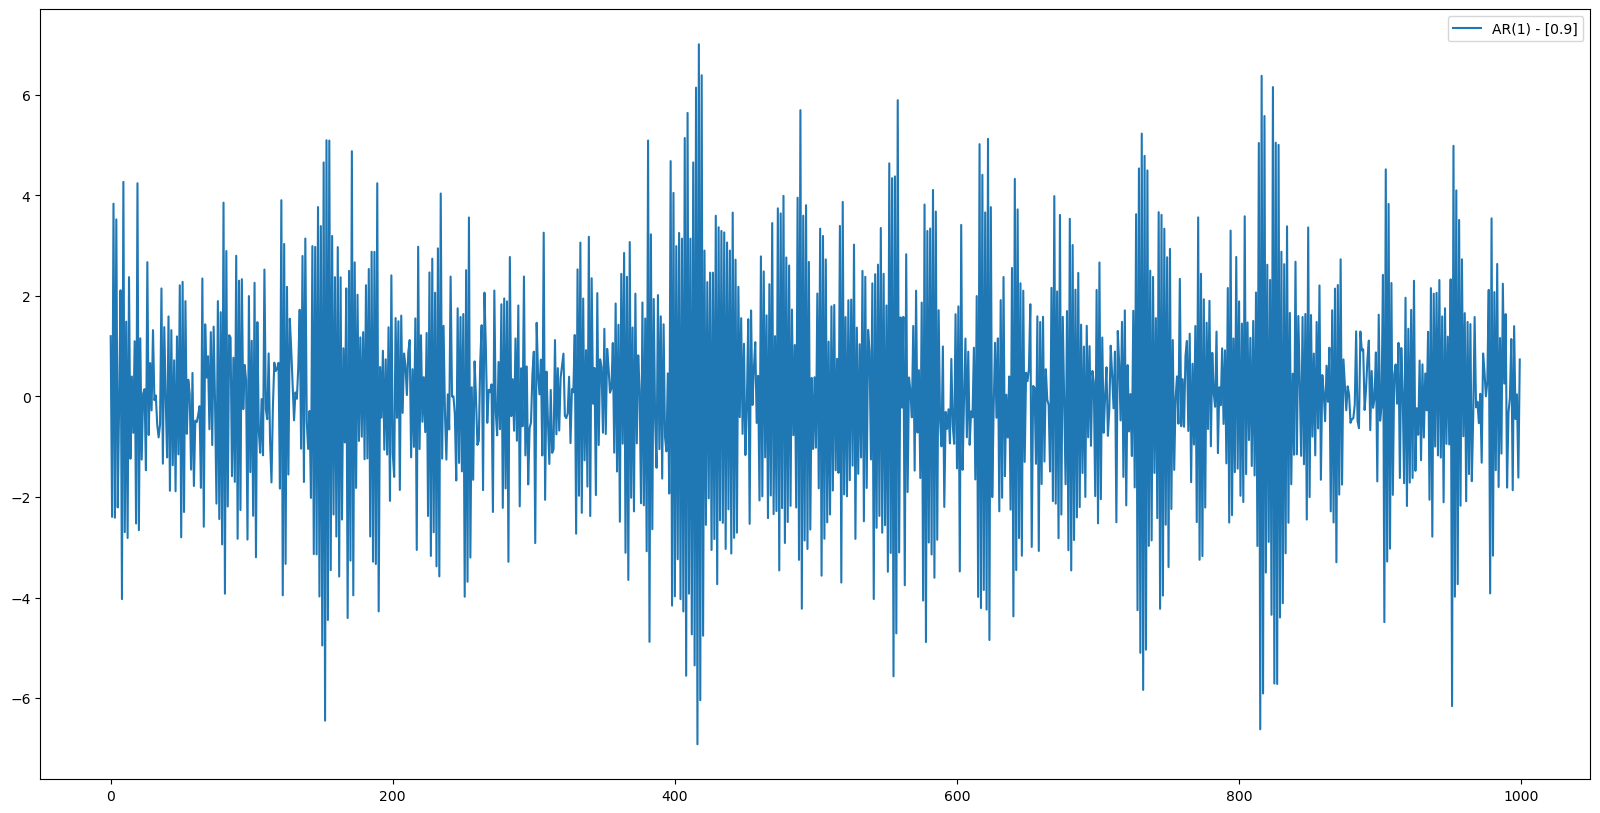

In [18]:
n = 1000

np.random.seed(1122) 
arterms1 = [.9]
ar = np.append([1], arterms1)
ma = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data1 = AR_object.generate_sample(nsample=n, burnin = 10000)
plt.figure(figsize = (20,10))
plt.plot(simulated_data1, label = 'AR(' + str(len(arterms1)) + ') - '  +str(arterms1))
legend()
plt.show()


In [19]:
simulated_datadf2 = pd.DataFrame({'Simulated Data 1' : simulated_data1
             })
simulated_datadf2['Simulated Data 2 (lag2)'] = simulated_datadf2['Simulated Data 1'].shift(2)
simulated_datadf2 = simulated_datadf2.dropna()

# simulated_data.head()

In [20]:
dataPct2 = simulated_datadf2.pct_change()
dataPct2 = dataPct2.dropna()
# dataPct.head()

In [21]:
# fig = px.line(simulated_data,
#               width=1000, height=700
#               , title = 'Synthetic Data')
# fig.show()

# fig = px.line(dataPct,
#               width=1000, height=700
#               ,title = 'Percent Change')
# fig.show()

In [22]:
# sns.heatmap(simulated_data.corr(), annot = True)

In [23]:
# Create point cloud of size 60 and stride 1
window_size = 150
stride = 1
df = simulated_datadf2
X = df
y = df.index
SW = SlidingWindow(size=window_size, stride=stride)
X_sw, yr = SW.fit_transform_resample(X, y)

In [24]:
# # Plot an arbitrary point cloud in 3D
# win = 60
# fig = px.scatter(x = X_sw[win][:,0],
#                     y = X_sw[win][:,1],
# #                     z = X_sw[win][:,2],
#                     labels = {'x': 'Simulated Data 1',
#                               'y': 'Simulated Data 2',
# #                               'z': 'Simulated Data 3'
#                              },
#                     width=1000, height=700,)
# fig.show()

In [25]:
# # Plot the persistence diagram and landscape for a random point cloud sliding window
# from gtda.homology import VietorisRipsPersistence
# pointcloud = X_sw[40]

# vrp = VietorisRipsPersistence()
# vrp.fit_transform_plot(pointcloud.reshape(1, *pointcloud.shape))
# plt.show()

# pl = PersistenceLandscape()
# persistencediagram = vrp.fit_transform(pointcloud.reshape(1, *pointcloud.shape))
# landscapedata = pl.fit_transform(persistencediagram)
# pl.plot(landscapedata, homology_dimensions = [1], plotly_params=None)

In [27]:
# Calculate the norms for each of the windows in the multivariate sliding window

# Initialize empty list
Norms = np.empty(window_size-1)
Norms[:] = np.nan
Norms = list(Norms)
vrp = VietorisRipsPersistence()
pl = PersistenceLandscape()
for pointcloud in X_sw:
    persistencediagram = vrp.fit_transform(pointcloud.reshape(1, *pointcloud.shape))
    landscapedata = pl.fit_transform(persistencediagram)
    tseq = Ftseq(persistencediagram[0])
    yvalues = landscapedata[0][1]
    Norms.append(Lpnorm(tseq, yvalues, p = 'auc'))

In [28]:
len(Norms)

998

In [29]:
len(simulated_datadf2)

998

In [30]:
min_max_scaler = MinMaxScaler()
data_scaled2 = min_max_scaler.fit_transform(simulated_datadf2.values)
data_scaled2 = pd.DataFrame(data_scaled2, columns = simulated_datadf2.columns, index = simulated_datadf2.index)
data_scaled2['L1 Norm'] = min_max_scaler.fit_transform(np.array(Norms).reshape(-1, 1)).reshape(-1)

In [31]:
# Plot normalized macroeconomic variables and norms
figlag2 = px.line(data_scaled2,
              width=1000, height=700,
             title = 'Normalized Data & L1 Norms - Lag 2')
# figlag2.show()

### Lag 3

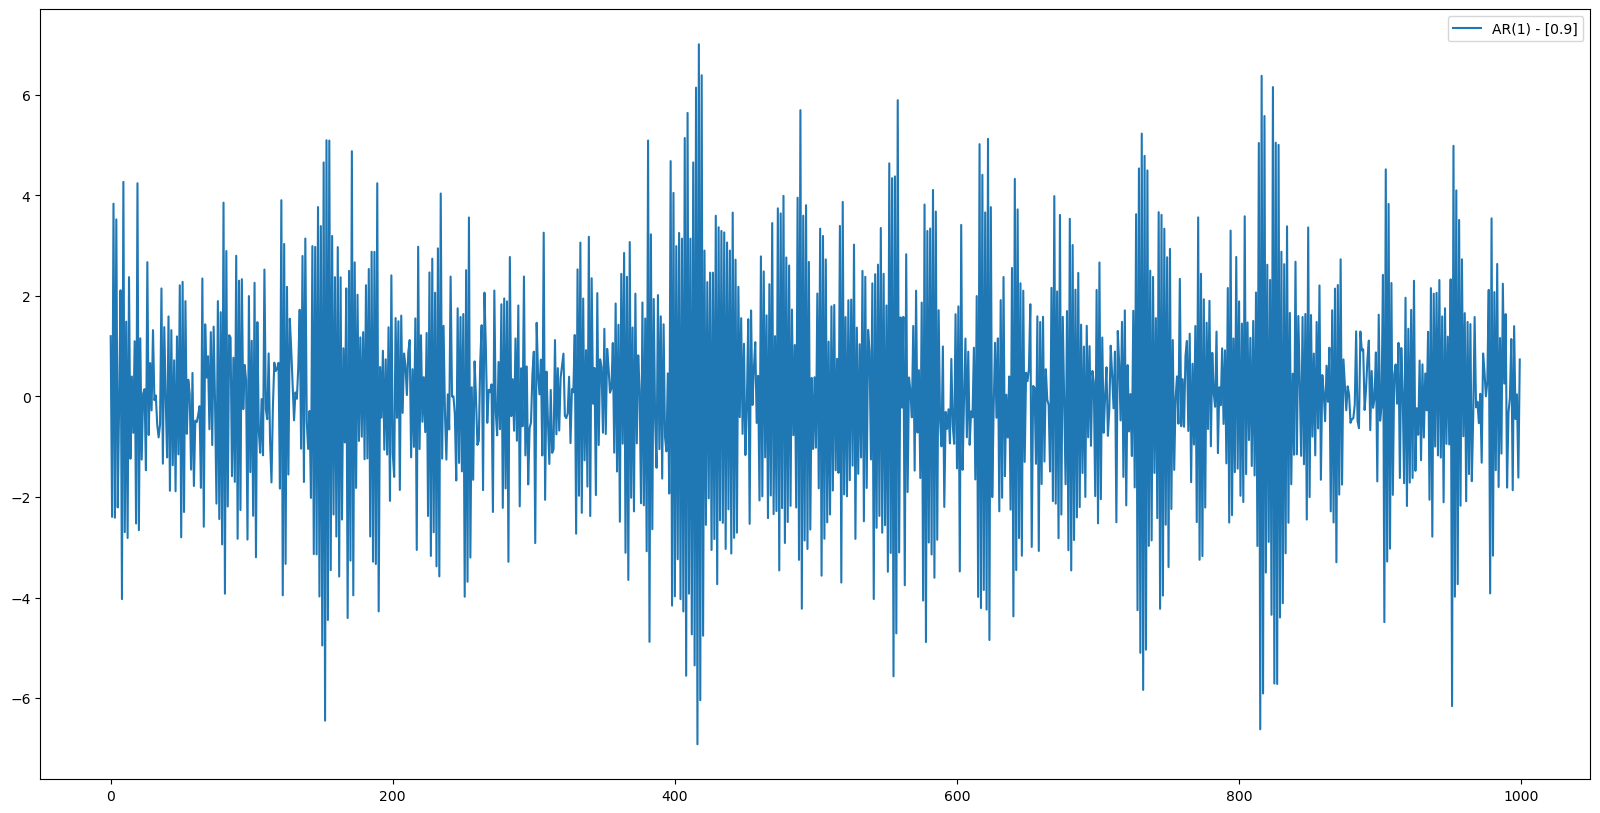

In [32]:
n = 1000

np.random.seed(1122) 
arterms1 = [.9]
ar = np.append([1], arterms1)
ma = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data1 = AR_object.generate_sample(nsample=n, burnin = 10000)
plt.figure(figsize = (20,10))
plt.plot(simulated_data1, label = 'AR(' + str(len(arterms1)) + ') - '  +str(arterms1))
legend()
plt.show()


In [33]:
simulated_datadf3 = pd.DataFrame({'Simulated Data 1' : simulated_data1
             })
simulated_datadf3['Simulated Data 2 (lag3)'] = simulated_datadf3['Simulated Data 1'].shift(3)
simulated_datadf3 = simulated_datadf3.dropna()

# simulated_data.head()

In [34]:
dataPct3 = simulated_datadf3.pct_change()
dataPct3 = dataPct3.dropna()
# dataPct.head()

In [35]:
# fig = px.line(simulated_data,
#               width=1000, height=700
#               , title = 'Synthetic Data')
# fig.show()

# fig = px.line(dataPct,
#               width=1000, height=700
#               ,title = 'Percent Change')
# fig.show()

In [36]:
# sns.heatmap(simulated_data.corr(), annot = True)

In [37]:
# Create point cloud of size 60 and stride 1
window_size = 150
stride = 1
df = simulated_datadf3
X = df
y = df.index
SW = SlidingWindow(size=window_size, stride=stride)
X_sw, yr = SW.fit_transform_resample(X, y)

In [38]:
# # Plot an arbitrary point cloud in 3D
# win = 60
# fig = px.scatter(x = X_sw[win][:,0],
#                     y = X_sw[win][:,1],
# #                     z = X_sw[win][:,2],
#                     labels = {'x': 'Simulated Data 1',
#                               'y': 'Simulated Data 2',
# #                               'z': 'Simulated Data 3'
#                              },
#                     width=1000, height=700,)
# fig.show()

In [39]:
# # Plot the persistence diagram and landscape for a random point cloud sliding window
# from gtda.homology import VietorisRipsPersistence
# pointcloud = X_sw[40]

# vrp = VietorisRipsPersistence()
# vrp.fit_transform_plot(pointcloud.reshape(1, *pointcloud.shape))
# plt.show()

# pl = PersistenceLandscape()
# persistencediagram = vrp.fit_transform(pointcloud.reshape(1, *pointcloud.shape))
# landscapedata = pl.fit_transform(persistencediagram)
# pl.plot(landscapedata, homology_dimensions = [1], plotly_params=None)

In [40]:
# Calculate the norms for each of the windows in the multivariate sliding window

# Initialize empty list
Norms = np.empty(window_size -1)
Norms[:] = np.nan
Norms = list(Norms)
vrp = VietorisRipsPersistence()
pl = PersistenceLandscape()
for pointcloud in X_sw:
    persistencediagram = vrp.fit_transform(pointcloud.reshape(1, *pointcloud.shape))
    landscapedata = pl.fit_transform(persistencediagram)
    tseq = Ftseq(persistencediagram[0])
    yvalues = landscapedata[0][1]
    Norms.append(Lpnorm(tseq, yvalues, p = 'auc'))

In [41]:
len(Norms)

997

In [42]:
len(simulated_datadf3)

997

In [43]:
min_max_scaler = MinMaxScaler()
data_scaled3 = min_max_scaler.fit_transform(simulated_datadf3.values)
data_scaled3 = pd.DataFrame(data_scaled3, columns = simulated_datadf3.columns, index = simulated_datadf3.index)
data_scaled3['L1 Norm'] = min_max_scaler.fit_transform(np.array(Norms).reshape(-1, 1)).reshape(-1)

In [44]:
# Plot normalized macroeconomic variables and norms
figlag3 = px.line(data_scaled3,
              width=1000, height=700,
             title = 'Normalized Data & L1 Norms - Lag 3')
# figlag3.show()

### Lag 4

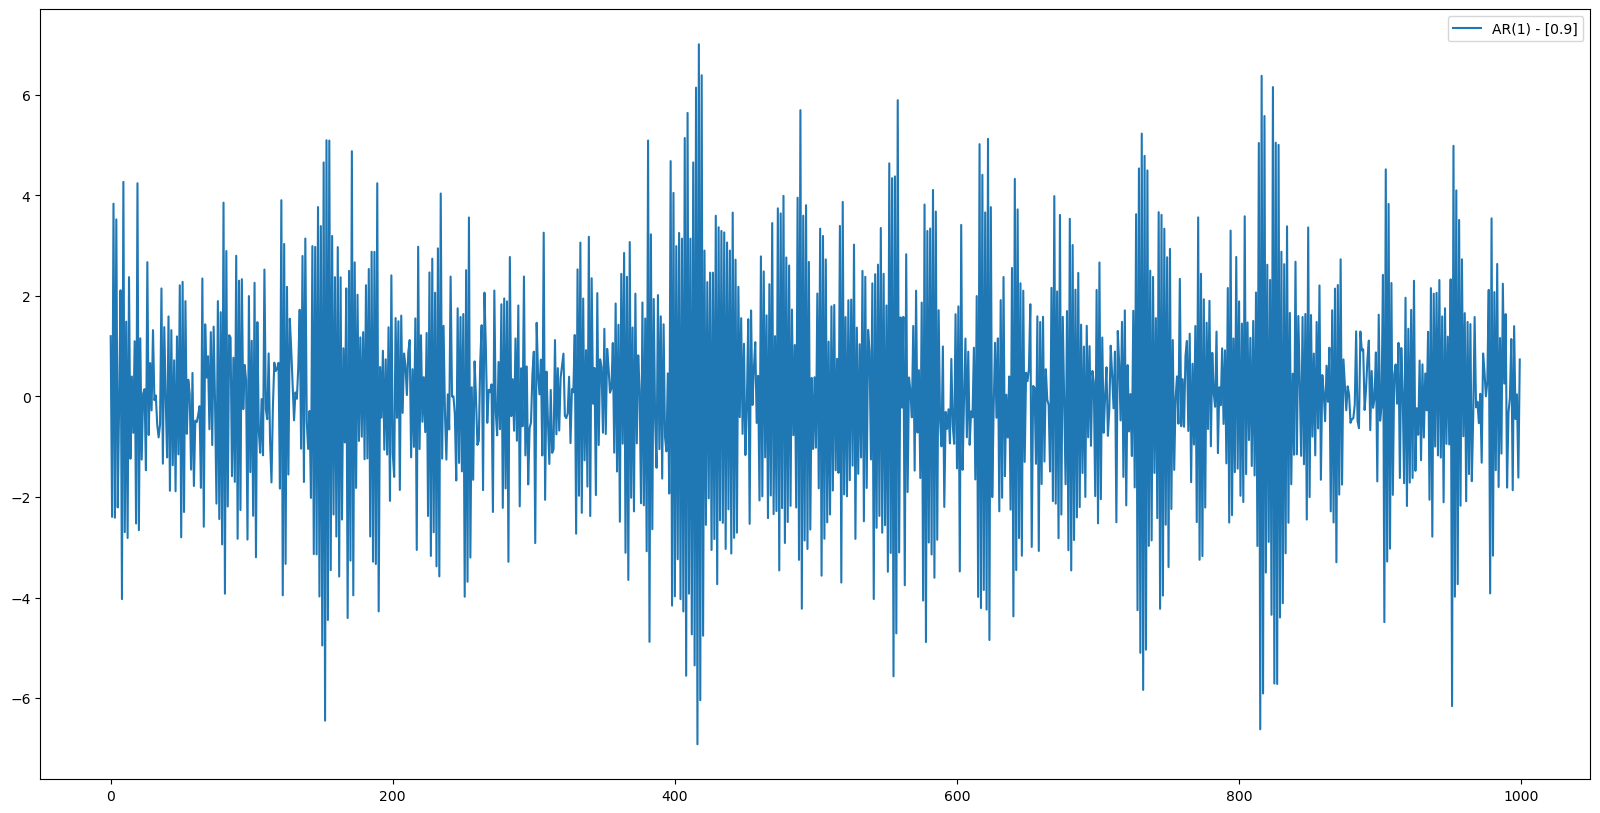

In [45]:
n = 1000

np.random.seed(1122) 
arterms1 = [.9]
ar = np.append([1], arterms1)
ma = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data1 = AR_object.generate_sample(nsample=n, burnin = 10000)
plt.figure(figsize = (20,10))
plt.plot(simulated_data1, label = 'AR(' + str(len(arterms1)) + ') - '  +str(arterms1))
legend()
plt.show()

In [46]:
simulated_datadf4 = pd.DataFrame({'Simulated Data 1' : simulated_data1
             })
simulated_datadf4['Simulated Data 2 (lag4)'] = simulated_datadf4['Simulated Data 1'].shift(4)
simulated_datadf4 = simulated_datadf4.dropna()

# simulated_data.head()

In [48]:
dataPct4 = simulated_datadf4
dataPct4 = dataPct4.dropna()
# dataPct4.head()

In [49]:
# fig = px.line(simulated_datadf4,
#               width=1000, height=700
#               , title = 'Synthetic Data')
# fig.show()

# fig = px.line(dataPct4,
#               width=1000, height=700
#               ,title = 'Percent Change')
# fig.show()

In [ ]:
# sns.heatmap(simulated_data.corr(), annot = True)

In [50]:
# Create point cloud of size 60 and stride 1
window_size = 150
stride = 1
df = simulated_datadf4
X = df
y = df.index
SW = SlidingWindow(size=window_size, stride=stride)
X_sw, yr = SW.fit_transform_resample(X, y)

In [51]:
# # Plot an arbitrary point cloud in 3D
# win = 717
# fig = px.scatter(x = X_sw[win][:,0],
#                     y = X_sw[win][:,1],
# #                     z = X_sw[win][:,2],
#                     labels = {'x': 'Simulated Data 1',
#                               'y': 'Simulated Data 2',
# #                               'z': 'Simulated Data 3'
#                              },
#                     width=1000, height=700,)
# fig.show()

In [52]:
# # Plot the persistence diagram and landscape for a random point cloud sliding window
# from gtda.homology import VietorisRipsPersistence
# pointcloud = X_sw[717]

# vrp = VietorisRipsPersistence()
# vrp.fit_transform_plot(pointcloud.reshape(1, *pointcloud.shape))
# plt.show()

# pl = PersistenceLandscape()
# persistencediagram = vrp.fit_transform(pointcloud.reshape(1, *pointcloud.shape))
# landscapedata = pl.fit_transform(persistencediagram)
# pl.plot(landscapedata, homology_dimensions = [1], plotly_params=None)

In [53]:
# Calculate the norms for each of the windows in the multivariate sliding window

# Initialize empty list
Norms = np.empty(window_size-1)
Norms[:] = np.nan
Norms = list(Norms)
vrp = VietorisRipsPersistence()
pl = PersistenceLandscape()
for pointcloud in X_sw:
    persistencediagram = vrp.fit_transform(pointcloud.reshape(1, *pointcloud.shape))
    landscapedata = pl.fit_transform(persistencediagram)
    tseq = Ftseq(persistencediagram[0])
    yvalues = landscapedata[0][1]
    Norms.append(Lpnorm(tseq, yvalues, p = 'auc'))

In [54]:
min_max_scaler = MinMaxScaler()
data_scaled4 = min_max_scaler.fit_transform(simulated_datadf4.values)
data_scaled4 = pd.DataFrame(data_scaled4, columns = simulated_datadf4.columns, index = simulated_datadf4.index)
data_scaled4['L1 Norm'] = min_max_scaler.fit_transform(np.array(Norms).reshape(-1, 1)).reshape(-1)

In [55]:
# Plot normalized macroeconomic variables and norms
figlag4 = px.line(data_scaled4,
              width=1000, height=700,
             title = 'Normalized Data & L1 Norms - Lag 4')
# figlag4.show()

In [57]:
# figlag1.show()
# figlag2.show()
# figlag3.show()
# figlag4.show()

In [68]:
simulated_datadf1

,Simulated Data 1,Simulated Data 2 (lag1)
1,-2.395736,1.199632
2,3.837022,-2.395736
3,-2.411561,3.837022
4,3.523737,-2.411561
5,-2.207392,3.523737
...,...,...
995,1.399890,-1.866086
996,-0.448277,1.399890
997,0.041643,-0.448277
998,-1.613579,0.041643


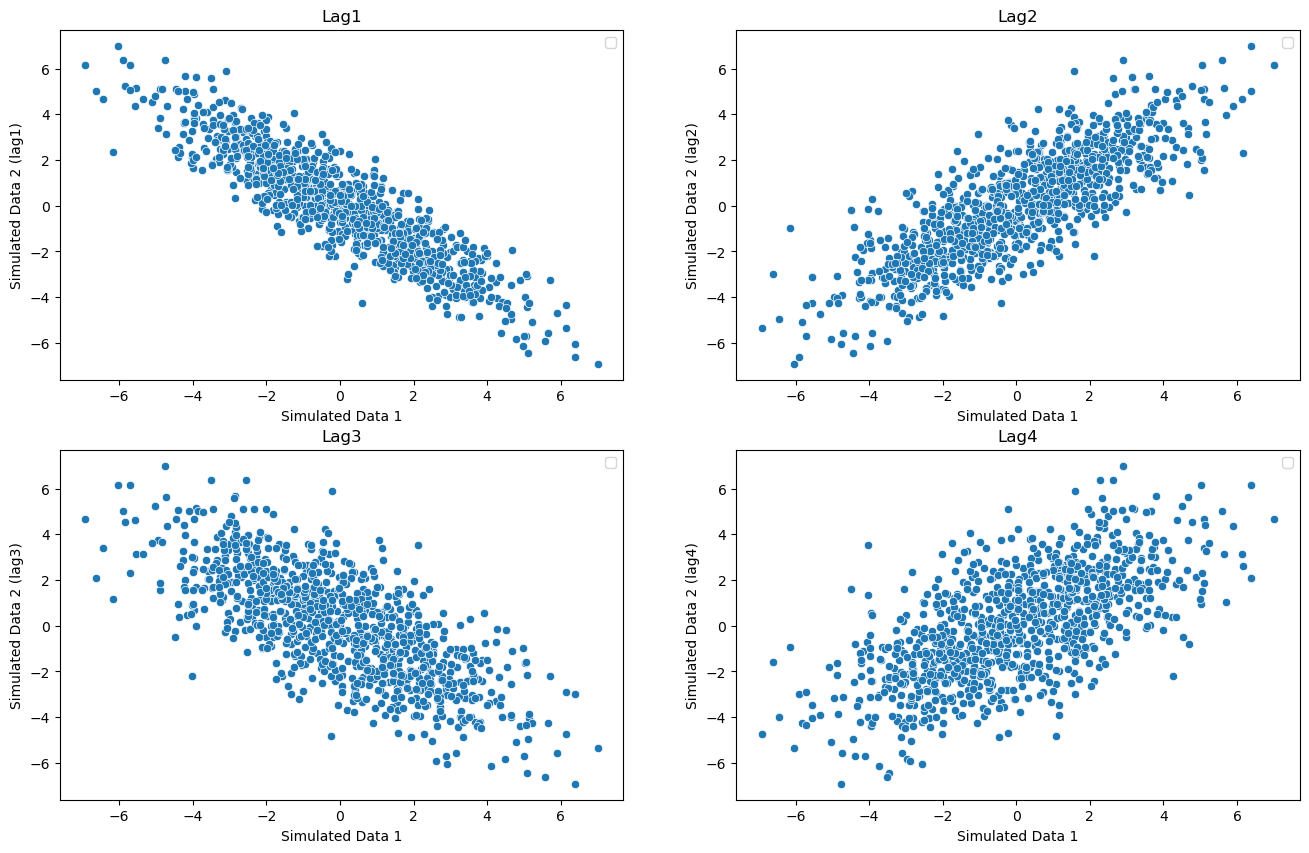

In [70]:
plt.figure(figsize = (16,10), facecolor = 'white')
plt.subplot(2,2,1)
sns.scatterplot(x = 'Simulated Data 1', y = 'Simulated Data 2 (lag1)', data = simulated_datadf1)
plt.title('Lag1')
plt.legend()
plt.subplot(2,2,2)
sns.scatterplot(x = 'Simulated Data 1', y = 'Simulated Data 2 (lag2)', data = simulated_datadf2)
plt.title('Lag2')
plt.legend()
plt.subplot(2,2,3)
sns.scatterplot(x = 'Simulated Data 1', y = 'Simulated Data 2 (lag3)', data = simulated_datadf3)
plt.title('Lag3')
plt.legend()
plt.subplot(2,2,4)
sns.scatterplot(x = 'Simulated Data 1', y = 'Simulated Data 2 (lag4)', data = simulated_datadf4)
plt.title('Lag4')
plt.legend()
plt.show()

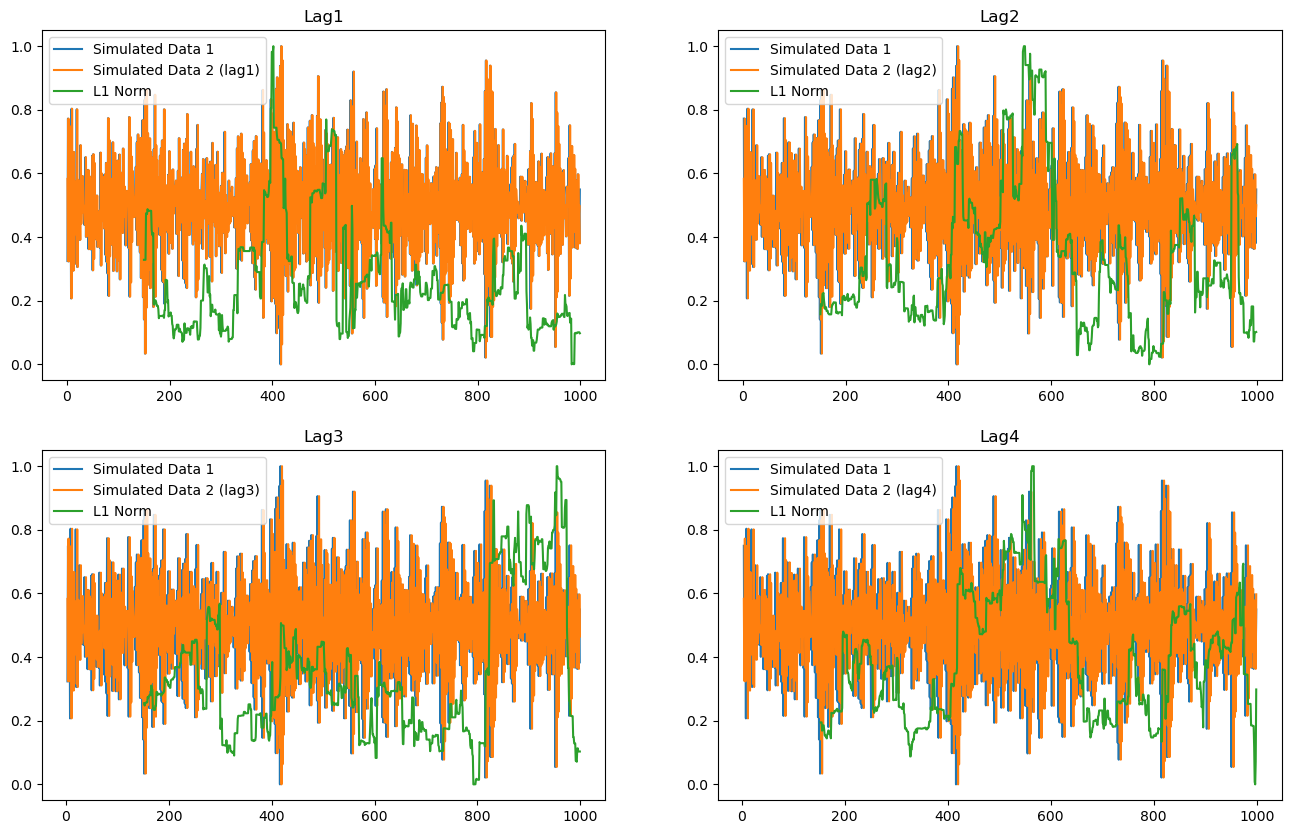

In [65]:
plt.figure(figsize = (16,10), facecolor = 'white')
plt.subplot(2,2,1)
plt.plot(data_scaled1, label = data_scaled1.columns)
plt.title('Lag1')
plt.legend()
plt.subplot(2,2,2)
plt.plot(data_scaled2, label = data_scaled2.columns)
plt.title('Lag2')
plt.legend()
plt.subplot(2,2,3)
plt.plot(data_scaled3, label = data_scaled3.columns)
plt.title('Lag3')
plt.legend()
plt.subplot(2,2,4)
plt.plot(data_scaled4, label = data_scaled4.columns)
plt.title('Lag4')
plt.legend()
plt.show()

In [80]:
np.trapz(list(pd.Series(Norms).dropna()))

18521.715187624715